Realizamos el mismo procedimiento, pero ahora en lugar de partir de una recta, partimos de una curva, que será más prescisa que la recta al representar el fenómeno físico que estamos estudiando.

In [1]:
# Importaciones necesarias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from faker import Faker

# Inicializamos Faker
faker = Faker()

print('Done')

Done


In [2]:
def ec_parabola(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    a = ((y3-y1)/(x3-x1) - (y2-y1)/(x2-x1)) /(x3-x2)
    b = (y2-y1)/(x2-x1) - a*(x2+x1)
    c = y1 - a*x1**2 - b*x1
    return a, b, c

# la curva pasa por el (0,0) porque a altura 0, el tiempo es 0
parab = ec_parabola((0,0), (1.00, 0.46), (2.00, 0.66))
print(f"La ecuación de la parabola es: y = {round(parab[0], 2)}x^2 + {round(parab[1], 2)}x + {round(parab[2], 2)}")

La ecuación de la parabola es: y = -0.13x^2 + 0.59x + 0.0


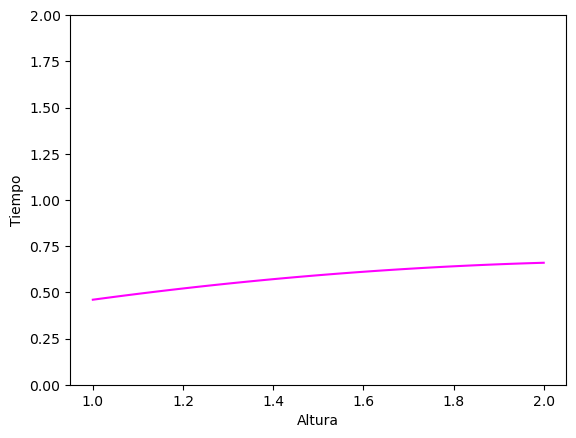

In [3]:
# curva de regresión calculada
def curva(x):
    return -0.13*x**2 + 0.59*x

x = np.linspace(1, 2, 100) # altura
y = curva(x) # tiempo
plt.plot(x, y, color='magenta', label='Recta de regresión')

plt.xlabel('Altura')
plt.ylabel('Tiempo')
plt.ylim(0, 2)  # para reducir la escala de la gráfica
plt.show()

In [4]:
# Datos aleatorios de la Tiempo
x_values = [faker.random.uniform(1, 2) for _ in range(100)]

# Usando la curva de regresion, calculamos los valores del Altura
y_values = [curva(v) for v in x_values]

#y les añadimos "ruido", para que diverjan un poco de la recta
y_values = [y + random.gauss(0, 0.05) for y in y_values]
                                # desviacion: cuando más cerca de 0 esté el valor, más se aproximan los puntos a la recta


# Creamos el DataFrame
datos = pd.DataFrame({'Altura': x_values,'Tiempo': y_values})
datos.head(100)

,Altura,Tiempo
0,1.801816,0.592447
1,1.955514,0.669620
2,1.434494,0.664562
3,1.824008,0.739036
4,1.617523,0.634284
...,...,...
95,1.102246,0.484156
96,1.524121,0.560888
97,1.669384,0.599718
98,1.725576,0.576927


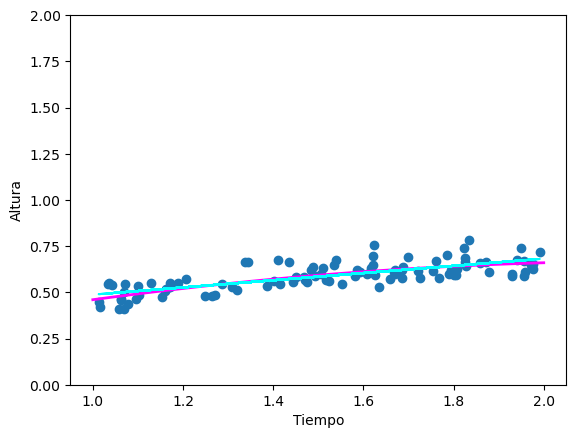

In [5]:
# Graficamos nuestra curva (que hemos usado para generar los datos)
plt.plot(x, y, color='magenta', label='Recta', linewidth=2) # nuestra recta

# Graficamos los datos
plt.scatter(x_values, y_values)  # graficar los datos
# y su recta de regresion 
m, b = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, m*np.array(x_values) + b, color='cyan', label='Recta de regresión')

# Nombrar los ejes
plt.xlabel('Tiempo')
plt.ylabel('Altura')
plt.ylim(0, 2)
plt.show()

In [6]:
def calcular_gravedad(h, t):
    '''Funcion que calcula la gravedad, conocidos la altura y el tiempo de caida'''
    return (2*h) / (t**2)

# AÑADIMOS LA GRAVEDAD CLACULADA AL DATAFRAME
datos_g = datos.copy()  # hacemos una copia del dataframe
g_calculada=[]  # columna que vamos a añadir al dataframe

for i in range(100):
    g_calculada.append(calcular_gravedad(datos.Altura[i], datos.Tiempo[i]))  # añadimos la gravedad calculada a la lista g_calculado

# añadimos la nueva columna
datos_g['g_calculada'] = g_calculada
datos_g.head(100)

,Altura,Tiempo,g_calculada
0,1.801816,0.592447,10.266938
1,1.955514,0.669620,8.722360
2,1.434494,0.664562,6.496184
3,1.824008,0.739036,6.679217
4,1.617523,0.634284,8.041044
...,...,...,...
95,1.102246,0.484156,9.404548
96,1.524121,0.560888,9.689418
97,1.669384,0.599718,9.283074
98,1.725576,0.576927,10.368636


In [7]:
# Creamos un diccionario con los planetas y sus respectivas gravedades
gravedad_planetas = { 'Tierra': 9.8, 'Marte': 3.7, 'Júpiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0}

def posible_planeta(g_calc):
    ''''Funcion que te dice, según la gravedad que le pases, en qué planeta estás'''
    planetas = {} # creamos un diccionario dif:planeta
    for g in gravedad_planetas.values():  # para cada gravedad de los planetas
        dif = abs(g_calc - g)  # la diferencia entre g_calc y la gravedad real del planeta
        #  asociamos a cada diferencia el planeta correspondiente
        planetas[dif] = list(gravedad_planetas.keys())[list(gravedad_planetas.values()).index(g)]

     # nos devuelve el planeta con la menor diferencia del calculo de gravedad
    return planetas[min(planetas.keys())] 


In [8]:
datos_g.describe()

,Altura,Tiempo,g_calculada
count,100.000000,100.000000,100.000000
mean,1.521440,0.588978,8.878833
std,0.295455,0.077110,1.493108
min,1.012956,0.408801,5.693463
25%,1.269457,0.545831,7.749401
50%,1.546901,0.593006,8.948702
75%,1.771964,0.639529,10.005070
max,1.991188,0.780974,12.649795


In [10]:
g_media = round(datos_g.g_calculada.mean(), 2)
print(f'La gravedad media de los datos es: {g_media}, por lo que estaremos cerca de {posible_planeta(g_media)}.')

La gravedad media de los datos es: 8.88, por lo que estaremos cerca de Saturno
